In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:

def volume_ellipse(axes,N,mustprint=False):
    volumePave = 1
    memaux = 1
    for a in axes :
        volumePave *= 2*a
        memaux *= a
    samples = []
    for k in range(N):
        thisSample = []
        for j in range(len(axes)):
            thisSample.append(np.random.rand()*axes[j])
        samples.append(thisSample.copy())

    res = 0
    for k in range(len(samples)):
        if indicatrice(samples[k],axes):
            res +=1
    estimateur = (res*volumePave/N)
    valeurTh = np.pi*memaux
    if mustprint:
        print(f'Valeur de l estimateur : {estimateur}')
        print(f'Valeur théorique : {valeurTh}')
    return(estimateur,valeurTh)

def indicatrice(sample,axes) :
    res = 0
    for k in range(len(axes)):
        res += (sample[k]/axes[k])**2
    return(res <= 1)

volume_ellipse([3,2],10000,True)


    


Valeur de l estimateur : 18.9096
Valeur théorique : 18.84955592153876


(18.9096, 18.84955592153876)

Proportion de tirages au delà de 1 sigma : 0.332


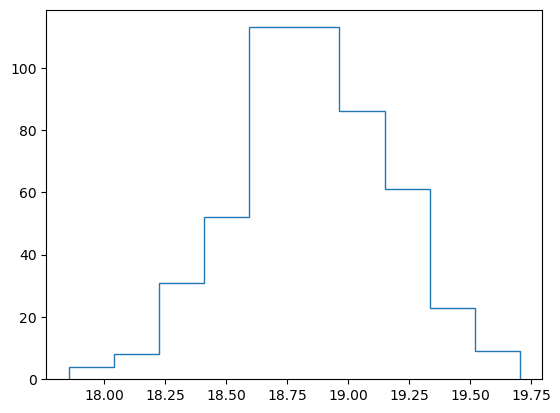

In [39]:
def histo_ellipse(axes,N,L):
    listRes = []
    for i in range(L):
        est,trash = volume_ellipse(axes,N)
        listRes.append(est)
    thisstd = np.std(listRes)
    thisavg = np.average(listRes)
    nbMoreThan1StdOff = 0
    for k in range(len(listRes)):
        if np.abs(listRes[k]-thisavg)>thisstd:
            nbMoreThan1StdOff += 1 
    nbMoreThan1StdOff /= len(listRes)
    print(f'Proportion de tirages au delà de 1 sigma : {nbMoreThan1StdOff}')
    counts, bins = np.histogram(listRes)
    plt.stairs(counts, bins)
    plt.show()
        
histo_ellipse([3,2],1000,500)
    

In [69]:
def generateur_de_fonction(nu):
    def res(t):
        return(np.sin(np.pi*2*nu*t))
    return(res)

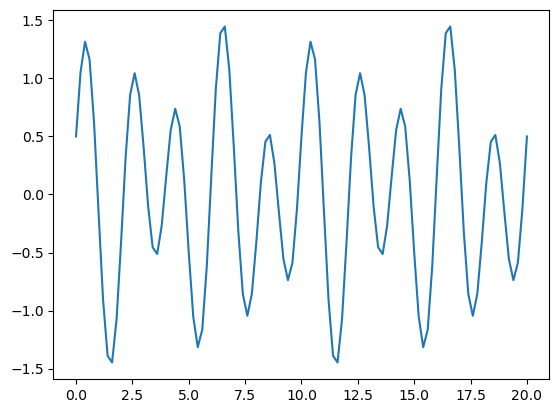

In [70]:
tbounds = [0,20]
nu = 0.5
tpas = 0.2
tech = np.linspace(tbounds[0],tbounds[1],int((tbounds[1]-tbounds[0])/tpas) +1)
f = generateur_de_fonction(nu)
ydouble = lambda x:np.sin(2*np.pi*0.5*x) + 0.5* np.cos(2*np.pi*0.3*x)
f = ydouble
yech = [f(t) for t in tech]
plt.plot(tech,yech)
plt.show()

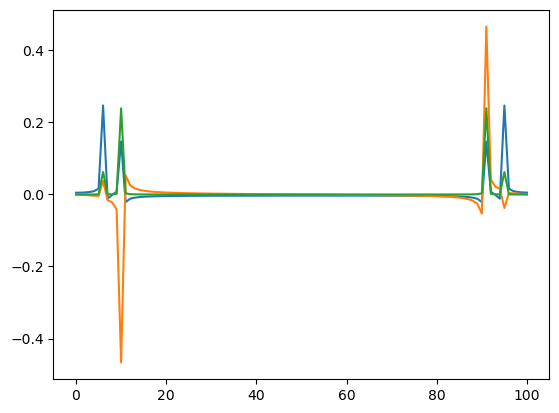

In [71]:
tfd = np.fft.fft(yech, norm='forward')
plt.plot(tfd.real)
plt.plot(tfd.imag)
plt.plot(np.abs(tfd)**2)


In [72]:
detailedFreq = np.fft.fftfreq(len(tfd), d = tech[1]-tech[0])


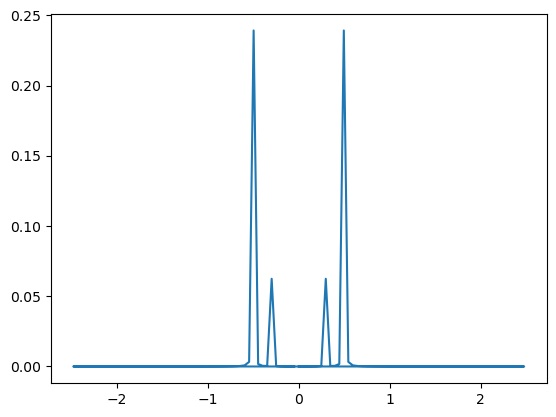

In [73]:
plt.plot(detailedFreq,np.abs(tfd)**2)

def get_fft_pow(t, s, norm = 'forward'):
  
    timestep = t[1]-t[0]
    freq = np.fft.fftfreq(len(s), d = timestep)
    tf = np.fft.fft(s, norm = norm)     # norm = 'forward' =>  tf *= 1/len(t) ; norm = 'ortho' => tf *= 1/sqrt(len(t))
    freq = np.fft.fftshift(freq)
    tf = np.fft.fftshift(tf)
    tfpow = np.abs(tf)**2  

    return (freq, tfpow)

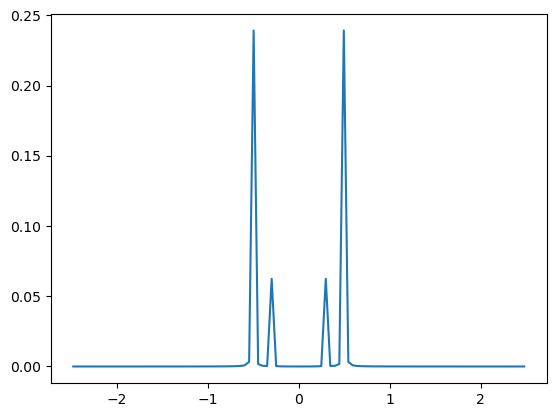

In [74]:
f_ord, tfd_ord = get_fft_pow(tech, yech)
plt.plot(f_ord,tfd_ord)

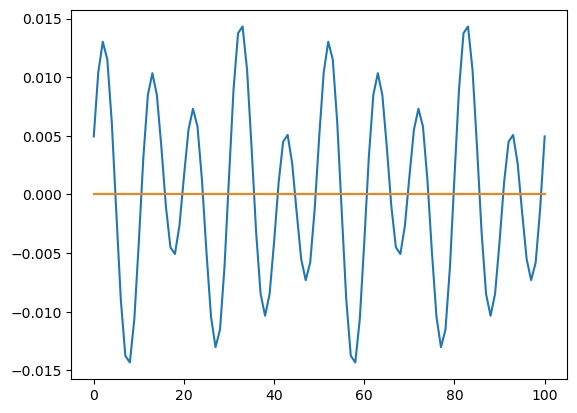

In [75]:
signal_reconstruit = np.fft.ifft(tfd)
plt.plot(signal_reconstruit.real)
plt.plot(signal_reconstruit.imag)

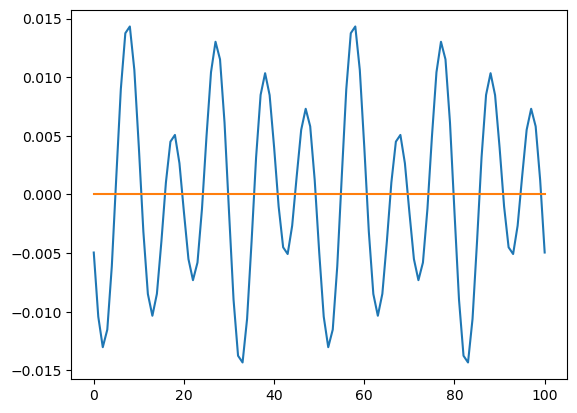

In [76]:
tfd2 = tfd*np.exp(1j*2*np.pi*nu*1)
signal_reconstruit2 = np.fft.ifft(tfd2)
plt.plot(signal_reconstruit2.real)
plt.plot(signal_reconstruit2.imag)

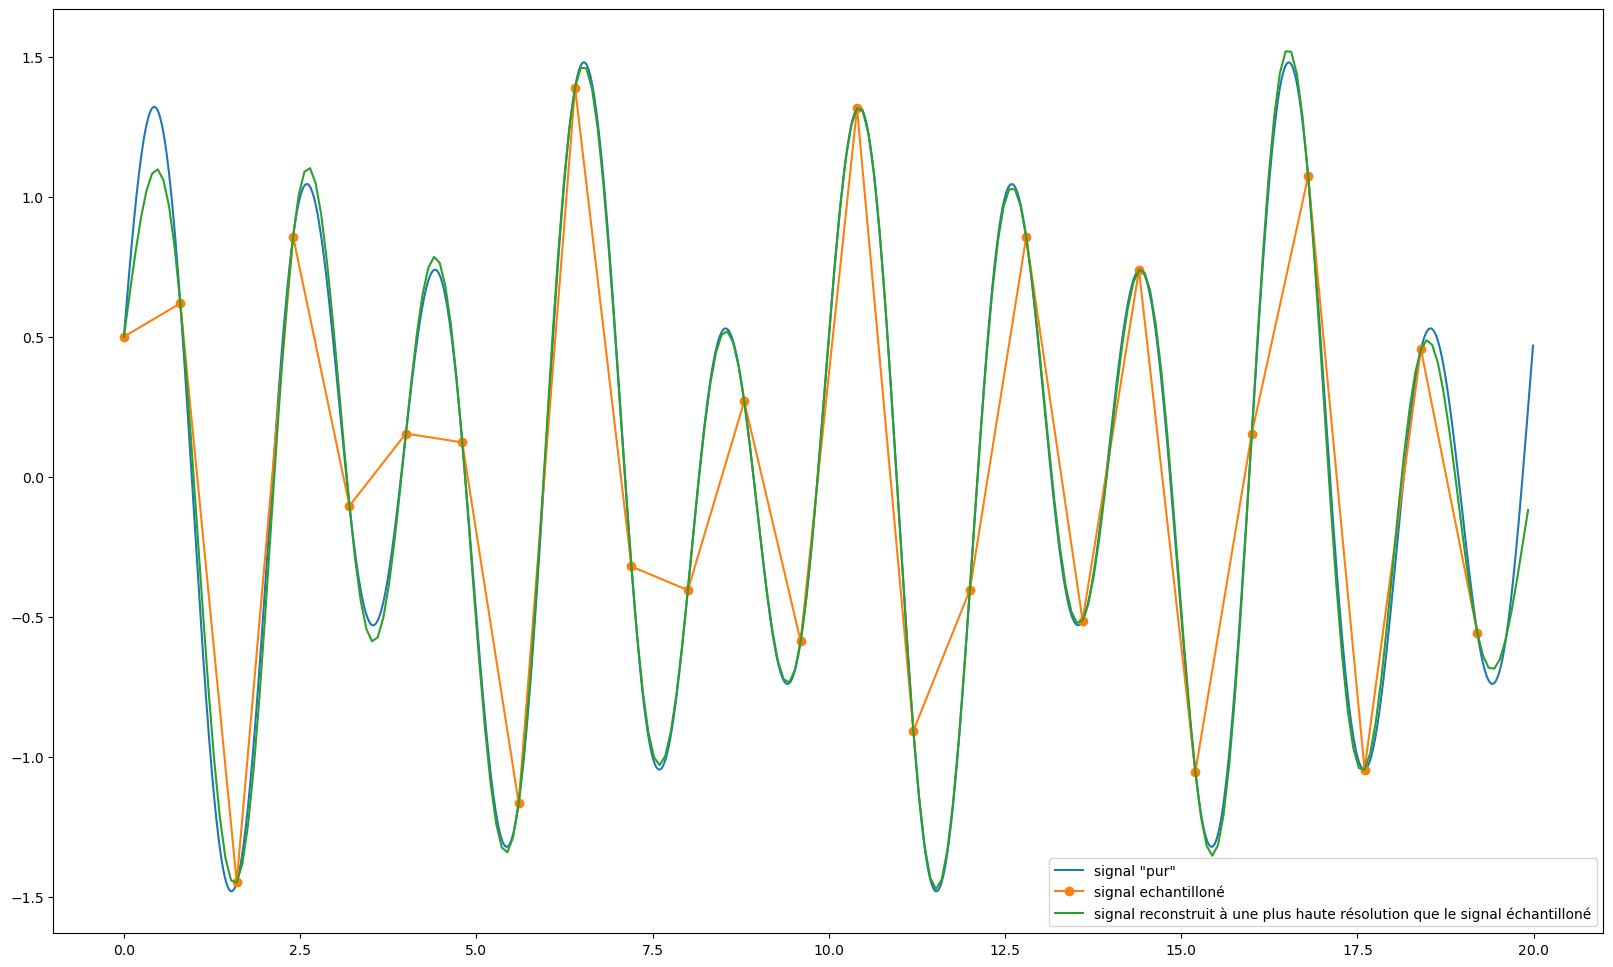

In [77]:
def enhance(tech, yech, tout):
    ''' Reconstruit le signal yech(tech) à la résolution de tout avec une somme de sinus cardinaux.
    Hypothèse sous-jacente : la fréquence d'échantillonage est supérieure au double de la fréquence 
    de coupure du signal (théorème de Nyquist-Shannon) '''
    
    yout = np.zeros_like(tout)
    Te = tech[1] - tech[0]
    for i in range(len(yech)):
        yout += yech[i] * np.sinc((tout-i*Te)/Te)
    return yout

# demo:
tpur = np.arange(0,20,0.01)
ypur = ydouble(tpur)

# signal échantillonné
Te = 0.8
tech = np.arange(0,20,Te)
yech = ydouble(tech)

# signal reconstruit à plus haute résolution
tout = np.arange(0,20,Te/10)
yout = enhance(tech, yech, tout)

plt.figure(figsize=(20,12))
plt.plot(tpur, ypur, label = 'signal "pur"')
plt.plot(tech, yech, 'o-', label = 'signal echantilloné')
plt.plot(tout, yout, label = 'signal reconstruit à une plus haute résolution que le signal échantilloné')
plt.legend()
plt.show()